# logistic regression

# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importing dataset

In [2]:
dataset = pd.read_csv('data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# test train split

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)


# feature scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# training the model

In [5]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

# testing model


In [6]:
y_pred = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)

In [7]:
[(y_test[i], y_pred[i], round(max(y_proba[i][0], y_proba[i][1]) * 100))
 for i in range(len(y_test))]

[(0, 0, 87),
 (0, 0, 82),
 (0, 0, 79),
 (0, 0, 90),
 (0, 0, 89),
 (0, 0, 99),
 (0, 0, 98),
 (1, 1, 73),
 (0, 0, 99),
 (0, 0, 50),
 (0, 0, 96),
 (0, 0, 97),
 (0, 0, 83),
 (0, 0, 62),
 (0, 0, 98),
 (0, 0, 65),
 (0, 0, 71),
 (0, 0, 98),
 (1, 1, 99),
 (0, 0, 95),
 (0, 0, 90),
 (1, 1, 96),
 (0, 0, 72),
 (1, 1, 87),
 (0, 0, 99),
 (1, 1, 97),
 (0, 0, 91),
 (0, 0, 91),
 (0, 0, 80),
 (0, 0, 83),
 (0, 0, 97),
 (1, 0, 70),
 (1, 1, 92),
 (0, 0, 84),
 (0, 0, 98),
 (0, 0, 100),
 (0, 0, 98),
 (0, 0, 93),
 (0, 0, 97),
 (1, 1, 54),
 (0, 0, 92),
 (0, 0, 71),
 (0, 0, 93),
 (0, 0, 96),
 (1, 1, 80),
 (0, 0, 97),
 (0, 0, 69),
 (1, 1, 92),
 (0, 0, 99),
 (1, 1, 85),
 (1, 1, 99),
 (0, 0, 96),
 (0, 0, 87),
 (0, 0, 57),
 (1, 1, 98),
 (1, 0, 68),
 (0, 0, 91),
 (0, 0, 95),
 (1, 0, 52),
 (0, 0, 100),
 (0, 0, 98),
 (1, 1, 92),
 (0, 0, 99),
 (1, 0, 60),
 (0, 0, 100),
 (1, 1, 98),
 (0, 0, 95),
 (0, 0, 97),
 (0, 0, 78),
 (0, 0, 53),
 (1, 1, 60),
 (0, 0, 78),
 (0, 0, 99),
 (1, 0, 74),
 (0, 0, 92),
 (0, 0, 99),
 (0, 1, 5

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.925

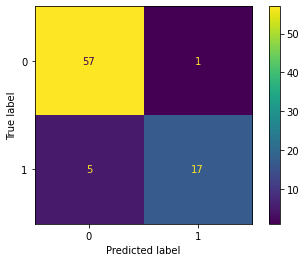

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


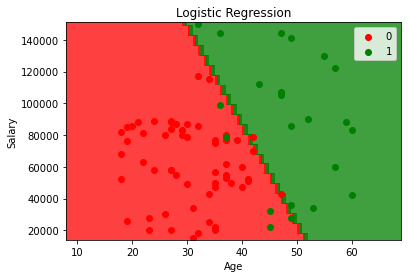

In [14]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=1),
                     np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Logistic Regression')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()